<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df_index=pd.read_excel("/content/economic_index.xlsx")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployement_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [15]:
## drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [16]:
df_index.head()

,interest_rate,unemployement_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [17]:
##check null values

df_index.isnull().sum()

interest_rate         0
unemployement_rate    0
index_price           0
dtype: int64

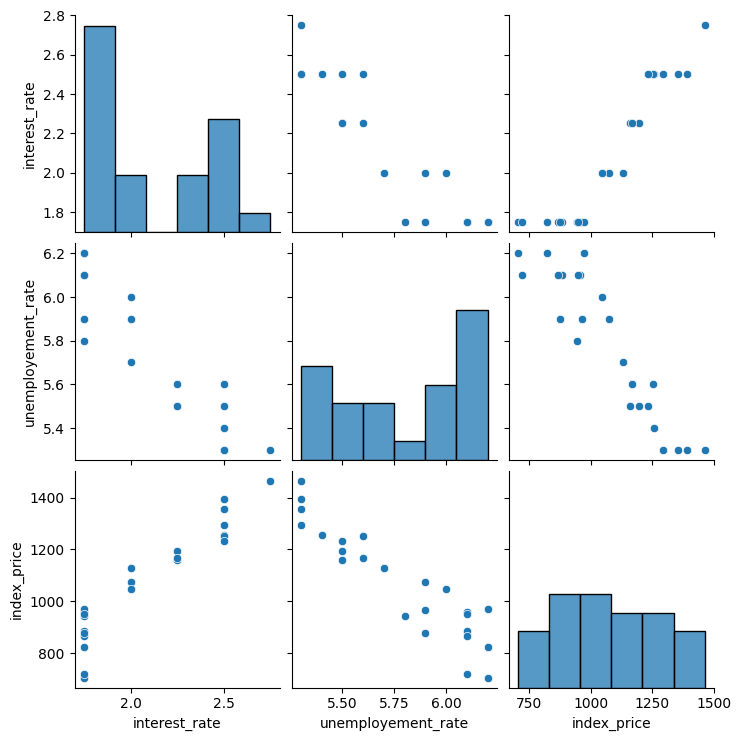

In [18]:
import seaborn as sns
sns.pairplot(df_index)

In [19]:
df_index.corr()

,interest_rate,unemployement_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployement_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000
